# Python Basics
## Syntax, Functions, Useful Packages, Reading Error Messages

### Before you start
We'll be assuming you have:
1. Installed Python 3 and Jupyter (steps 1 and 2 of [this guide](https://nbviewer.jupyter.org/github/rses-datascience/DataSurgeries/blob/master/S01_GettingStarted/Getting%20Started%20in%20Python.ipynb)).
2. Know the very-basics of Python.

If you're unsure on point 2, do  [this 'first steps in python' course](https://www.codecademy.com/en/courses/learn-python/lessons/python-syntax/exercises/welcome). It has 13 steps, and takes about 10 minutes to complete. 


### Programme:
1. Basics of Jupyter: cells, evaluation, note taking.
2. Basic structure of Python: variables, types, packages, namespaces.
3. Iterating: loops, conditional loops, list comprehension.
4. Functions: making code re-usable
5. Useful Packages: Python can't actually do that much...
6. When things go wrong... live examples with $RealData$<sup>&reg;</sup>

## 1. Jupyter Basics

### Cells
Jupyter is arranged as a series of 'cells'. There are two types of cells - `Markdown` cells for taking notes 
(like this one), and `code` cells, like the next one. The type of the cell determines what Jupyter does when you 'evaluate' the cell. A `markdown` cell will be rendered as nice text, and a `code` cell will be sent to Python to be run.

In [1]:
# This is code cell (this is a python comment, so nothing will happen when we evaluate it)

# Notice how the number in square brackets on the left increases each time you evaluate the cell?
# This allows you to keep track of what *order* the code cells have been run in. This can be important,
# as we'll get to later.

### Shortcut Keys
Jupyter fantastic, fast and flexible... but you won't find this out until you break free of the menu bar at the top, and get to know the shortcut keys. You can see the full list of shortcut keys in the Help menu at the top.

The Jupyter Notebook has two different keyboard input modes. 'Edit' mode allows you to type code or text into a cell, and is indicated by a green cell border. Command mode binds the keyboard to notebook level commands and is indicated by a grey cell border with a blue left margin.

In **Both Modes**:
- <kbd>Ctrl-Enter</kbd>: Evaluate current cell, keep focus on cell
- <kbd>Shift-Enter</kbd>: Evaluate current cell, move to next cell
- <kbd>Alt-Enter</kbd>: Evaluate current cell, insert new cell underneath

In **Command Mode**:
- <kbd>Enter</kbd>: Enter **Edit Mode**
- <kbd>Up/Down Arrow</kbd>: Move the focus between different cells.
- <kbd>p</kbd>: Open **Command Palette**
- <kbd>d-d</kbd>: Delete cell
- <kbd>a</kbd>: Create new cell above current
- <kbd>b</kbd>: Create new cell below current
- <kbd>c</kbd>: Copy current cell
- <kbd>v</kbd>: Paste copied cell below current

In **Edit Mode**:
- <kbd>Esc</kbd>: Enter **Command Mode**
- <kbd>Tab</kbd>: Auto-complete the current variable/function/parameter.
- <kbd>Shif-Tab</kbd>: Bring up the documentation for the current function.

### Note Taking
One of the best features of Jupyter is the ability to take comprehensive notes alongside your code. Notes are written in the [Markdown](https://daringfireball.net/projects/markdown/) language, which is pleasantly simple and capable. All of this is written in markdown. In the above we've used headings and sub-headings, numbered and bulleted lists, HTML tags (the keyboard symbols above), and included links. 

As well as all that, you can include images, and write in-line $\frac{Equations}{1}$, as well as standalone ones using $\LaTeX$ notation:

$$ f(x) = A e^{-\frac{(x - b)^2}{2c^2}}$$

That *should* cover all your note-taking needs.

To see what markdown looks like, highlight this cell in **Command Mode**, and press <kbd>Enter</kbd> to enter **Edit Mode**.

## 2. Python Structure

### Variables and types
When you're using Jupyter, it starts Python running in the background in a 'Kernel'. Whenever you evaluate a code cell, the code is sent to this Kernal to be run.

Just after launch, you can think of the Python running in this kernel as a blank canvas, with almost nothing on it - just Python's 'base' functionality, which is remarkably minimal.

Let's create some variable:

In [2]:
a = 42
print(a)

42


This creates a named variable that is stored by Python. In storing it, it's entered into what's called the 'namespace': the space where all the names are kept... At a low level, these 'names' store pointers towards parts of your computer's memory where the value associated with that name is stored.

In [3]:
# to see the memory-address of the where '42' is stored on your computer.
hex(id(a))

'0x55dfcdc68f20'

In practice you don't need to think about this often...

When you create a variable, Python stores the data you give it, and works out what `type` it is. You can find out what `type` a variable is:

In [4]:
print(type(a))

<class 'int'>


The `type` of a variable tells Python how to handle the variable when you (for example) want to add it to another variable:

In [5]:
# add two integers
x = 1 + 2
print(x, type(x))

# add two 'floats'
y = 1.0 + 2.0
print(y, type(y))

# add an int and a float
w = x + y
print(w, type(w))

# add two strings?
z = 'a' + 'b'
print(z, type(z))

3 <class 'int'>
3.0 <class 'float'>
6.0 <class 'float'>
ab <class 'str'>


There are [a few different built-in data types](https://docs.python.org/3/library/stdtypes.html), which we'll get into a bit more later.

Variables can re re-assigned:

In [6]:
print(a, type(a))

a = 'not 42 any more!'
print(a, type(a))

42 <class 'int'>
not 42 any more! <class 'str'>


So you have to be careful not to *overwrite* your variables while coding. This is surprisingly easy to do, as code gets longer. Be careful to use unique names for important variables!

In [7]:
# Bad:
important_variable = 1 + 2 * 3
#[... lots of code ...]
important_variable = 52.32

# Good:
variable_A = 1 + 2 * 3
# [... lots of code ...]
variable_B = 52.32

# Always be explicit!

So let's do something useful!

In science, we often deal with arrays of data, and apply various numeric operations to them. Let's do that in Python!

In [8]:
data = [1, 4, 3, 4, 3, 2, 56]
result = data * 4.3

TypeError: can't multiply sequence by non-int of type 'float'

Nnnnope. The variable `data` is a `list`, which is **not** an array. A `list` can contain anything you like - numbers, string, other lists, and more... - it doesn't contain any information on how Python should treat its contents, so it's completely unsuitable for the type of numerical operations we like to do in science. This is a major difference from other languages like Matlab, where all data are stored as vectors/matrices, and can be treated as such.

In Python, the basic data types are *not* designed for science - they're designed for *flexibility*. To manipulate data, we need...

### Packages
When you first start Python, there are only [a few basic functions](https://docs.python.org/3/library/functions.html#built-in-functions) available. Python can't actually do that much 'out of the box'. This is another key difference from things like Matlab, which pre-load every possible function and the kitchen sink when you start it. This is because Matlab is designed for a single purpose (matrix manipulation), so it makes sense to just load all the functions relating to matrices when you start the program. 

Python is multi purpose, and is used for everything from running websites to controlling robots and analysing data. Loading *all* possible functions that Python uses would be spectacularly inefficient, so instead Python uses modular 'packages', which contain a heap of functions for a specific purpose.

To access these functions, you have to `import` them. For example, you can bring in *all* the functions available in the fantastic [**Nu**meric **Py**thon (numpy)](http://www.numpy.org/) package by running:

In [9]:
import numpy

Now all of numpy's vast capabilities are availabe within the `numpy` command, which you access by using a period (`.`) after `numpy`... for example:

In [10]:
numpy.add(1, 2)

3

But this is a bit clumsy, right? Why can't we just use `add`, like we do in other (Matlab) languages? We can do this if we want to, and import all of `numpy`'s functions directly:

In [11]:
from numpy import *

add(1, 2)

3

**BUT WAIT!!** This is a terrible idea... remember that variable called `array` that we made at the start? `numpy` has a function in it called `array`, which has just overwritten our carefully defined variable!

In [12]:
# I create a list called array (very bad idea from the starting point, as a list is a list, and not an array... 
# but let's do it!)

# I create my list called array
array = [1, 2, 3, 4]

# I need numpy so I import everything
from numpy import *

# Wait, what is array now?
print(array)
# no longer [1, 2, 3, 4] :(

<built-in function array>


If you've imported all of the functions from a big library like `numpy` into your namespace, you risk accidentally over-writing variabiles you've already defined, or over-writing some of `numpy`'s important functions when you define a new variable.

### Multiple 'Namespaces'

By importing `numpy`, rather than its contents (as we did initially), it loads all of its functions inside a *separate* `numpy` **namespace** - i.e. none of numpy's functions can interfere with variables defined in your 'top level' Python namespace, because they're all trapped *inside* `numpy`.

You can make it slightly less clunky, by *renaming* `numpy` during import to make it less arduous to access its functions:

In [13]:
import numpy as np

Now all of `numpy`'s functions are available via the `np` prefix instead of `numpy`, which is more convenient to type. You can rename imports anything you like...

In [14]:
import numpy as giraffe

giraffe.add(1, 2)

3

But that's a bit silly... 

`np` has become the conventional name for `numpy` in Python codes... So it's good to use that. Using conventions is a good idea because it makes the code readable by anyone: people will know what `np.array` means, but `giraffe.array` is... less evident!

`numpy` is specifically designed for numerical operations on arrays - i.e. what Matlab does, so let's try again...

In [15]:
data = np.array([1, 4, 3, 4, 3, 2, 56])
result = data * 4.3

result
# it works!

array([  4.3,  17.2,  12.9,  17.2,  12.9,   8.6, 240.8])

**Important**: Always use namespaces. It keeps things organised, and prevent you accidentally breaking/overwriting things.

## 3. Useful Packages

Anyone can make a package for any purpose, and there are a **lot** out there. [On 15th March there were 132,268](https://pypi.python.org/pypi). How do you find the right one for the job?

1. Ask people, or [Google!](http://lmgtfy.com/?q=python+packages+for+data+science) Things like 'python package for...' and then terms that are as specific as possible for your problem. Often you won't get to the package page itself, but to some kind of guide that uses the package. Look at their `import` section to find out what they're using. It's possible you'll find more than one option.
2. Find out more - look at the package's home page. If there isn't one, look on the [Python Package Index (PyPi)](https://pypi.python.org/pypi). Is being actively maintained (look at the [last upload date on PyPi](https://pypi.python.org/pypi/numpy/1.14.2), or is it 'dead'? If you've found more than one possible option, it's generally better to go for the one that is better documented and more recently updated.
3. Install it! Using `conda` or `pip`, as appropriate.

A few highlights for scientific applications:

<table>
    <tr>
        <th><a href="https://docs.scipy.org/doc/scipy/reference/">SciPy</a></th>
        <td><strong>Sci</strong>entific <strong>Py</strong>thon. A diverse range of data analysis and manipulation tools, from statistical tests to data fitting and spectral analysis.</td>
    </tr>
    <tr>
        <th><a href="http://pandas.pydata.org/">Pandas</a></th>
        <td>A mature 'data frame' library for organising and analysing data. Think spreadsheets but for Python, and with much more advanced data processing capabilities.</td>
    </tr>
    <tr>
        <th><a href="http://www.numpy.org/">NumPy</a></th>
        <td><strong>Num</strong>eric <strong>Py</strong>thon. The workhorse for array-based numeric calculations in Python.</td>
    </tr>
    <tr>
        <th><a href="http://www.sympy.org/en/index.html">SymPy</a></th>
        <td>Symbolic algebra! Write, manipulate and solve equations.</td>
    </tr>
    <tr>
        <th><a href="https://matplotlib.org/">Matplotlib</a></th>
        <td>Publication-ready plots, with a few lines of code.</td>
    </tr>
</table>

## 4. Iteration

If you're coming from Excel (or any other spreadsheet), this is where things start getting interesting.

The basics are:

In [16]:
for i in [1, 5, 2, 'wahoo']:
    print(i)

1
5
2
wahoo


Python iterates through each of the provided inputs, and does something to them.

How might this be useful in practice? Imagine you want to perform a calculation that is *state dependent* - i.e. depends on the value the last time it was calculated:

In [17]:
# start condition
out = [5] # out is a list there

# an base 2 exponential decay
for i in range(1, 10):
    out.append(out[i-1] * 0.5) # we add the result of our calculation to the list
    
print(out) # printing out

[5, 2.5, 1.25, 0.625, 0.3125, 0.15625, 0.078125, 0.0390625, 0.01953125, 0.009765625]


You can also do interesting things like nested loops:

In [18]:
for i in range(2):
    for j in range(3):
        print(i, j)

0 0
0 1
0 2
1 0
1 1
1 2


And use conditions:

In [19]:
for i in range(50233992):
    if i == 5:
        break  # stops the loop if condition is met
    print('boing')

boing
boing
boing
boing
boing


In [20]:
# a while loop is similar:
# keeps looping until a condition is met
i = 0
while i < 5:
    print('twang')
    i += 1

twang
twang
twang
twang
twang


Iteration can make repetitive tasks easy - for example applying the same calculation to all rows of a large data table, or [testing the influence of varying a particular parameter in a model](https://nbviewer.jupyter.org/github/rses-datascience/DataSurgeries/blob/master/06_MonteCarlo/06_MonteCarloUncertainty.ipynb).

## 5. Functions

Often while analysing data you might find yourself copying and pasting code to either modify some aspect of it without breaking the original, or apply it to a different data set. This is where *functions* come in. A function takes inputs, does something to the inputs, and then returns something.

Writing functions makes code re-usable.

A trivial example:

In [21]:
def add(a, b):
    return a + b

In [22]:
add(5, 12)

17

A more useful example:

In [23]:
def seawater_density(Temp, Sal):
    A = 8.24493e-1 - 4.0899e-3 * Temp + 7.6438e-5 * Temp**2 - 8.2467e-7 * Temp**3 + 5.3875e-9 * Temp**4
    B = -5.72466e-3 + 1.0227e-4 * Temp - 1.6546e-6 * Temp**2
    C = 4.8314e-4
    p0 = 999.842594 + 6.793952e-2 * Temp - 9.095290e-3 * Temp**2 + 1.001685e-4 * Temp**3 - 1.120083e-6 * Temp**4 + 6.536336e-9 * Temp**5
    
    return p0 + A * Sal + B * Sal**(3/2) + C * Sal

In [24]:
for sal in [30, 35, 40]:
    print(seawater_density(25, sal))

1019.149135142922
1022.7681219162893
1026.3737739717553


In [25]:
seawater_density(25, 35)

1022.7681219162893

This is short-term useful, but if you were to return to it in 6 months, there's some important information missing:
- Is temperature in C or K?
- Where do all the coefficients come from?!

Making it use-able: [good practice](https://github.com/numpy/numpy/blob/master/doc/HOWTO_DOCUMENT.rst.txt)

In [26]:
def seawater_density(Temp=25.0, Sal=35.0):
    """
    Calculate seawater density from Temperature and Salinity.
    
    Using the formulation of Millero and Poisson (1981,
    doi:10.1016/0198-0149(81)90122-9)
    
    Parameters
    ----------
    Temp : float or numpy.ndarray
        Temperature in Celcius
    Sal : float or numpy.ndarray
        Salinity
    
    Returns
    -------
    Density of seawater in kg m-3 : float or numpy.ndarray
    """
    A = (8.24493e-1 - 
         4.0899e-3 * Temp + 
         7.6438e-5 * Temp**2 - 
         8.2467e-7 * Temp**3 + 
         5.3875e-9 * Temp**4)
    B = (-5.72466e-3 + 
         1.0227e-4 * Temp - 
         1.6546e-6 * Temp**2)
    C = 4.8314e-4
    p0 = (999.842594 + 
          6.793952e-2 * Temp - 
          9.095290e-3 * Temp**2 + 
          1.001685e-4 * Temp**3 - 
          1.120083e-6 * Temp**4 + 
          6.536336e-9 * Temp**5)
    
    return p0 + A * Sal + B * Sal**(3/2) + C * Sal

In [27]:
seawater_density()

1022.7681219162893

Now with the nice doc, if in 10 months you don't remember how to use seawater_density(), you can call for help!

In [28]:
help(seawater_density)

Help on function seawater_density in module __main__:

seawater_density(Temp=25.0, Sal=35.0)
    Calculate seawater density from Temperature and Salinity.
    
    Using the formulation of Millero and Poisson (1981,
    doi:10.1016/0198-0149(81)90122-9)
    
    Parameters
    ----------
    Temp : float or numpy.ndarray
        Temperature in Celcius
    Sal : float or numpy.ndarray
        Salinity
    
    Returns
    -------
    Density of seawater in kg m-3 : float or numpy.ndarray



More generally:

In [29]:
def my_function(a):
    """
    One-line description of function.
    
    This whole thing at the start is called a 'docstring'. There's a 
    standard format to make them immediately readable. No everyeone adheres
    to it, but they should.
    
    The bit between the one line summary and the 'Parameters' (below) can
    contain a bit more detail about what it does (if necessary).
    
    Parameters
    ----------
    a : type that a should be for the function to work properly
        Information about what this should be.
    
    Returns
    -------
    Description of the output : type of the output
    
    Examples
    --------
    >>> my_function(5)
    5
    """
    
    return a

In [30]:
help(my_function)

Help on function my_function in module __main__:

my_function(a)
    One-line description of function.
    
    This whole thing at the start is called a 'docstring'. There's a 
    standard format to make them immediately readable. No everyeone adheres
    to it, but they should.
    
    The bit between the one line summary and the 'Parameters' (below) can
    contain a bit more detail about what it does (if necessary).
    
    Parameters
    ----------
    a : type that a should be for the function to work properly
        Information about what this should be.
    
    Returns
    -------
    Description of the output : type of the output
    
    Examples
    --------
    >>> my_function(5)
    5



## 6. When things go wrong...

Live examples!!!

Bring your laptop - we can all do it together, and work out all the bugs.

### Importing Data

In [49]:
import pandas as pd

In [50]:
dat = pd.read_table('ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt',
                    comment='#', sep='\s+', header=None, na_values=[-99.99, -1])

In [51]:
dat.columns = ['year', 'month', 'dec_year', 'co2_av', 'c2_interp', 'co2_trend', 'days']

### Plotting

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

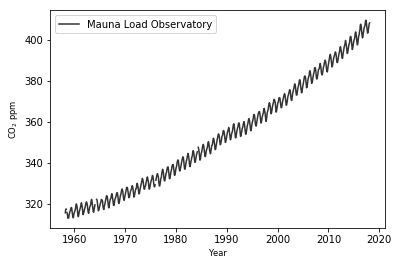

In [53]:
plt.plot(dat.loc[:, 'dec_year'], dat.loc[:, 'co2_av'], c=(0,0,0,0.8), label='Mauna Load Observatory')

plt.xlabel('Year')
plt.ylabel('$CO_2$ ppm')

plt.legend()

plt.savefig('co2_record.png')

### Fitting a model

In [54]:
import numpy as np
import scipy.optimize as opt
dat.dropna(inplace=True)

In [55]:
# model function - try modifying this!
def co2_record(year, p0, p1, p2, p3, phase, amp):
    seasons = np.sin((year - phase) * (2 * np.pi)) * amp
    return year**3 * p3 + year**2 * p2 + year * p1 + p0 + seasons

In [56]:
# model optimisation
p, cov = opt.curve_fit(co2_record, dat.loc[:, 'dec_year'], dat.loc[:, 'co2_av'])

In [57]:
# parameter standard deviation
np.sqrt(np.diag(cov))

array([1.80224510e+05, 2.70850845e+02, 1.35680169e-01, 2.26554347e-05,
       2.77067019e-03, 5.12061640e-02])

In [58]:
# parameters
p

array([-2.55853537e+06,  3.86752431e+03, -1.94922316e+00,  3.27593550e-04,
        1.05511210e+00,  2.93088831e+00])

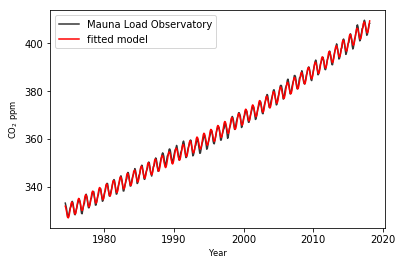

In [59]:
plt.plot(dat.loc[:, 'dec_year'], dat.loc[:, 'co2_av'], c=(0,0,0,0.8), label='Mauna Load Observatory')

plt.plot(dat.loc[:, 'dec_year'], co2_record(dat.loc[:, 'dec_year'], *p), c='r', label='fitted model')

plt.xlabel('Year')
plt.ylabel('$CO_2$ ppm')

plt.legend()

plt.savefig('co2_record.png')

### Propagating Uncertainties

If you get an error on uncertainties:

Open a terminal window and run:

```
pip install uncertainties
```

In [63]:
import uncertainties.unumpy as un

In [65]:
a = un.uarray(5, .2)

In [66]:
a * 10

50.0+/-2.0

In [70]:
# package fitted parameters with their uncertainties
params = un.uarray(p, np.sqrt(np.diag(cov)))

In [71]:
params

array([-2558535.368139577+/-180224.50960569386,
       3867.5243093779513+/-270.8508448941184,
       -1.9492231561738496+/-0.13568016901563182,
       0.0003275935503670573+/-2.265543469372339e-05,
       1.0551121027302912+/-0.002770670186597723,
       2.9308883055363752+/-0.051206164036097346], dtype=object)

In [72]:
# model function
def co2_record(year, p0, p1, p2, p3, phase, amp):
    seasons = un.sin((year - phase) * (2 * np.pi)) * amp  # note: changed 'np.sin' to 'un.sin'
    # Necessary because numpy's sin doesn't support error propagation, so must use the 'uncerainties' one.
    return year**3 * p3 + year**2 * p2 + year * p1 + p0 + seasons

In [73]:
fit = co2_record(dat.loc[:, 'dec_year'], *params)

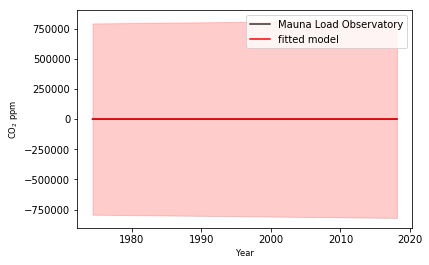

In [77]:
plt.plot(dat.loc[:, 'dec_year'], dat.loc[:, 'co2_av'], c=(0,0,0,0.8), label='Mauna Load Observatory')

plt.plot(dat.loc[:, 'dec_year'], un.nominal_values(fit), c='r', label='fitted model')

plt.fill_between(x=dat.loc[:, 'dec_year'], 
                 y1=un.nominal_values(fit) - un.std_devs(fit),
                 y2=un.nominal_values(fit) + un.std_devs(fit), 
                 color='r', alpha=0.2)

plt.xlabel('Year')
plt.ylabel('$CO_2$ ppm')

plt.legend()

plt.savefig('co2_record.png')

### Propagated errors are HUGE!

This is because the fitted parameters of a polynomial are highly correlated, and standard error propagation is only valid if the parameters are *not* correlated.

More on this in the 'fitting models to data' session.